### Problema
Se tiene un conjunto de datos que representa una señal oscilatoria, modelada
teóricamente por:

$$
y = A\sin(Bx + C)
$$

Los datos experimentales contienen ruido. Se busca encontrar los valores óptimos A,
B y C que mejor ajusten la función teórica a los datos, minimizando el error cuadrático
medio.

In [36]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [37]:
datos_PSO = pd.read_excel('Datos_PSO.xlsx')

In [38]:
datos_PSO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


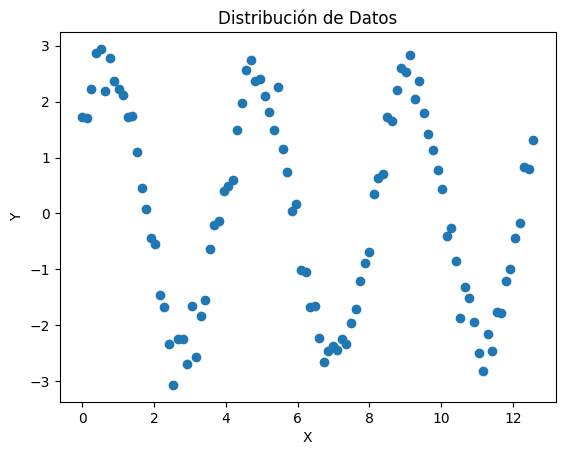

In [39]:
#Graficamos los datos
plt.scatter(datos_PSO['x'], datos_PSO['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribución de Datos')
plt.show()

In [40]:
import numpy as np

# ==== Datos observados ====
x_datos = datos_PSO['x'].to_numpy()
y_datos = datos_PSO['y'].to_numpy()

# ==== Función objetivo (error del modelo) ====
def error_modelo(parametros, x_datos, y_datos):
    A, B, C = parametros
    y_pred = A * np.sin(B * x_datos) + C
    mse = np.mean((y_datos - y_pred)**2)
    return mse

# ==== Inicialización de partículas ====
def incicializar_particula(n_particula, dim, limites):
    posiciones = np.zeros((n_particula, dim)) 
    velocidades = np.zeros((n_particula, dim))

    l_inf = np.array([limites[i][0] for i in range(dim)])
    l_sup = np.array([limites[i][1] for i in range(dim)])

    for i in range(n_particula):
        for d in range(dim):
            posiciones[i][d] = np.random.uniform(l_inf[d], l_sup[d])
            velocidades[i][d] = np.random.uniform(-abs(l_sup[d]-l_inf[d]), abs(l_sup[d]-l_inf[d])) * 0.1
    return posiciones, velocidades

# ==== Parámetros PSO ====
dim = 3  # a, b, c
n_particula = 100
max_iter = 500
w = 0.7
c1 = 1.5
c2 = 1.5
limites = [(-10, 10), (-10, 10), (-10, 10)]  # Limites Provicionales

# ==== Inicialización ====
posiciones, velocidades = incicializar_particula(n_particula, dim, limites)
p_best = np.copy(posiciones)
p_best_val = np.zeros(n_particula)

for i in range(n_particula):
    p_best_val[i] = error_modelo(p_best[i], x_datos, y_datos)

g_best_indice = np.argmin(p_best_val)
g_best_posiciones = np.copy(p_best[g_best_indice])
g_best_val = p_best_val[g_best_indice]

v_max = np.zeros(dim)
for d in range(dim):
    v_max[d] = abs(limites[d][1] - limites[d][0]) * 0.2

# ==== Iteraciones ====
for t in range(max_iter):
    for i in range(n_particula):
        r1 = np.random.rand(dim)
        r2 = np.random.rand(dim)

        for d in range(dim):
            cognitivo = c1 * r1[d] * (p_best[i][d] - posiciones[i][d])
            social = c2 * r2[d] * (g_best_posiciones[d] - posiciones[i][d])
            velocidades[i][d] = (w * velocidades[i][d]) + cognitivo + social
            posiciones[i][d] += velocidades[i][d]

        fitness = error_modelo(posiciones[i], x_datos, y_datos)

        if fitness < p_best_val[i]:
            p_best_val[i] = fitness
            p_best[i] = np.copy(posiciones[i])

        if fitness < g_best_val:
            g_best_val = fitness
            g_best_posiciones = np.copy(posiciones[i])

print("\n=== Resultado ===")
print(f"a: {g_best_posiciones[0]:.4f}")
print(f"b: {g_best_posiciones[1]:.4f}")
print(f"c: {g_best_posiciones[2]:.4f}")
print(f"Error cuadrático medio: {g_best_val:.6f}")



=== Resultado ===
a: -2.4498
b: -1.5602
c: -0.0121
Error cuadrático medio: 0.304066


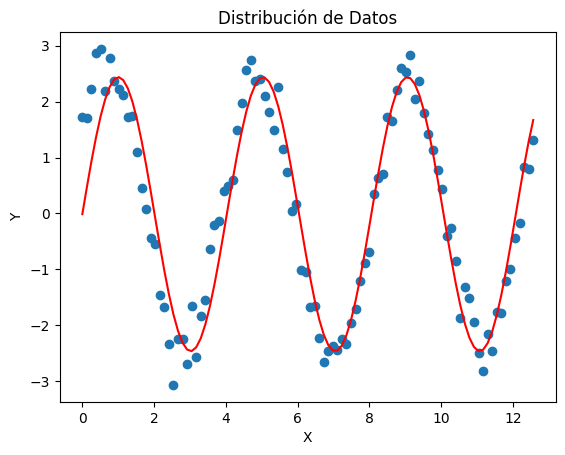

In [41]:
# Graficamos resultados 

A, B, C = g_best_posiciones
plt.scatter(datos_PSO['x'], datos_PSO['y'])
plt.plot(datos_PSO['x'], A * np.sin(B * datos_PSO['x']) + C, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribución de Datos')
plt.show()